<a href="https://colab.research.google.com/github/kluless13/paper/blob/main/yolo_nas_LF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Sun Sep 17 11:57:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Installing YOLO-NAS

In [2]:
!pip install super_gradients
!pip install roboflow
!pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 53.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 105.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 105.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 9.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build whee

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 2.4.5
    Uninstalling pyparsing-2.4.5:
      Successfully uninstalled pyparsing-2.4.5
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Successfully uninstalled 

In [1]:
import torch

DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
%cd {HOME}

from roboflow import Roboflow
# Roboflow API

/content
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to lionfish-1 in yolov5pytorch:: 100%|██████████| 1922/1922 [00:00<00:00, 5614.33it/s]


In [5]:
LOCATION = dataset.location
print("location:", LOCATION)
CLASSES = sorted(project.classes.keys())
print("classes:", CLASSES)

location: /content/lionfish-1
classes: ['Lionfish']


### Fine Tuning

In [6]:
MODEL_ARCH = 'yolo_nas_l'
BATCH_SIZE = 8
MAX_EPOCHS = 25
CHECKPOINT_DIR = f'{HOME}/checkpoints'
EXPERIMENT_NAME = project.name.lower().replace(" ", "_")

In [7]:
from super_gradients.training import Trainer

trainer = Trainer(experiment_name=EXPERIMENT_NAME, ckpt_root_dir=CHECKPOINT_DIR)

[2023-09-17 11:58:03] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-09-17 11:58:03] WARNING - __init__.py - Failed to import pytorch_quantization


The console stream is logged into /root/sg_logs/console.log


[2023-09-17 11:58:08] INFO - utils.py - NumExpr defaulting to 8 threads.
Setuptools is replacing distutils.
[2023-09-17 11:58:11] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-09-17 11:58:11] WARNING - export.py - Failed to import pytorch_quantization
[2023-09-17 11:58:11] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [8]:
dataset_params = {
    'data_dir': LOCATION,
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': CLASSES
}

In [9]:
from super_gradients.training.dataloaders.dataloaders import (
    coco_detection_yolo_format_train, coco_detection_yolo_format_val)

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

[2023-09-17 11:58:19] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 786/786 [00:00<00:00, 6722.64it/s]
[2023-09-17 11:58:19] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 112/112 [00:00<00:00, 6329.32it/s]
[2023-09-17 11:58:19] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 57/57 [00:00<00:00, 6069.29it/s]


In [10]:
train_data.dataset.transforms # Inspecting dataset

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': (640, 640), 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': (640, 640), 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': (640, 640), 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5),
 DetectionPaddedRescale('additional_samples_count': 0, 'non_em

### Instantiate the model

In [11]:
from super_gradients.training import models

model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    pretrained_weights="coco"
)

[2023-09-17 11:58:31] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth
100%|██████████| 256M/256M [00:00<00:00, 303MB/s]
[2023-09-17 11:58:33] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


#### Defining the metrics and training parameters

In [12]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": MAX_EPOCHS,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

In [21]:
!tensorboard dev upload \
  --logdir {CHECKPOINT_DIR}/{EXPERIMENT_NAME} \
  --name "yolo NAS LF" \
  --description "yolo NAS metrics" \
  --one_shot

2023-09-17 12:50:50.604840: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/a7G9PpjbQ7OZ7fa4nK4UEA/

[2023-09-17T12:50:52] Started scanning logdir.
W0917 12:50:52.855619 134191755632640 uploader.py:794] Tensor (run:., tag:hyper_params/text_summary, step: 0) too large; skipping. Size 66095 exceeds limit of 16384 bytes.
[2023-09-17T12:50:53] Total uploaded: 913 scalars, 1 tensors (223 B), 0 binary objects
Total skipped: 1 tensors (64.5 kB)
[2023-09-17T12:50:53] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/a7G9PpjbQ7OZ7fa4nK4UEA/


### Training the model

In [17]:
trainer.train(
    model=model,
    training_params=train_params,
    train_loader=train_data,
    valid_loader=val_data
)

The console stream is now moved to /content/checkpoints/lionfish/console_Sep17_12_08_55.txt


[2023-09-17 12:08:55] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
[2023-09-17 12:08:57] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Dataset size:                 786        (len(train_set))
    - Batch size per GPU:           8          (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             8          (num_gpus * batch_size)
    - Effective Batch size:         8          (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         98         (len(train_loader))
    - Gradient updates per epoch:   98         (len(train_loader) / batch_accumulate)

[2023-09-17 12:08:57] INFO - sg_trainer.py - Started training for 25 epochs (0/24)

Validating: 100%|██████████| 14/14 [00:05<00:00,  2.71it/s]
[2023-09-17 12:10:10] INFO - base_sg_logger.py 

SUMMARY OF EPOCH 0
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.9237
│   ├── Ppyoloeloss/loss_iou = 0.3049
│   ├── Ppyoloeloss/loss_dfl = 1.7737
│   └── Ppyoloeloss/loss = 3.5729
└── Validation
    ├── Ppyoloeloss/loss_cls = 2.14
    ├── Ppyoloeloss/loss_iou = 0.2054
    ├── Ppyoloeloss/loss_dfl = 1.4616
    ├── Ppyoloeloss/loss = 3.3843
    ├── Precision@0.50 = 0.0
    ├── Recall@0.50 = 0.0
    ├── Map@0.50 = 0.0419
    └── F1@0.50 = 0.0



Validating epoch 1: 100%|██████████| 14/14 [00:05<00:00,  2.64it/s]
[2023-09-17 12:11:20] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/lionfish/ckpt_best.pth
[2023-09-17 12:11:20] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5302457809448242


SUMMARY OF EPOCH 1
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1796
│   │   ├── Epoch N-1      = 1.9237 (↘ -0.7441)
│   │   └── Best until now = 1.9237 (↘ -0.7441)
│   ├── Ppyoloeloss/loss_iou = 0.2371
│   │   ├── Epoch N-1      = 0.3049 (↘ -0.0678)
│   │   └── Best until now = 0.3049 (↘ -0.0678)
│   ├── Ppyoloeloss/loss_dfl = 1.5027
│   │   ├── Epoch N-1      = 1.7737 (↘ -0.271)
│   │   └── Best until now = 1.7737 (↘ -0.271)
│   └── Ppyoloeloss/loss = 2.5238
│       ├── Epoch N-1      = 3.5729 (↘ -1.0491)
│       └── Best until now = 3.5729 (↘ -1.0491)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.8115
    │   ├── Epoch N-1      = 2.14   (↘ -0.3286)
    │   └── Best until now = 2.14   (↘ -0.3286)
    ├── Ppyoloeloss/loss_iou = 0.1787
    │   ├── Epoch N-1      = 0.2054 (↘ -0.0267)
    │   └── Best until now = 0.2054 (↘ -0.0267)
    ├── Ppyoloeloss/loss_dfl = 1.3337
    │   ├── Epoch N-1      = 1.4616 (↘ -0.1279)
    │   └── Best until now = 1.4616 (↘ -0.1279)
    ├── Ppyoloeloss/loss

Validating epoch 2: 100%|██████████| 14/14 [00:05<00:00,  2.60it/s]
[2023-09-17 12:12:28] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/lionfish/ckpt_best.pth
[2023-09-17 12:12:28] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7304857969284058


SUMMARY OF EPOCH 2
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.071
│   │   ├── Epoch N-1      = 1.1796 (↘ -0.1086)
│   │   └── Best until now = 1.1796 (↘ -0.1086)
│   ├── Ppyoloeloss/loss_iou = 0.2353
│   │   ├── Epoch N-1      = 0.2371 (↘ -0.0019)
│   │   └── Best until now = 0.2371 (↘ -0.0019)
│   ├── Ppyoloeloss/loss_dfl = 1.4628
│   │   ├── Epoch N-1      = 1.5027 (↘ -0.0398)
│   │   └── Best until now = 1.5027 (↘ -0.0398)
│   └── Ppyoloeloss/loss = 2.3906
│       ├── Epoch N-1      = 2.5238 (↘ -0.1332)
│       └── Best until now = 2.5238 (↘ -0.1332)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.359
    │   ├── Epoch N-1      = 1.8115 (↘ -0.4525)
    │   └── Best until now = 1.8115 (↘ -0.4525)
    ├── Ppyoloeloss/loss_iou = 0.1795
    │   ├── Epoch N-1      = 0.1787 (↗ 0.0008)
    │   └── Best until now = 0.1787 (↗ 0.0008)
    ├── Ppyoloeloss/loss_dfl = 1.3484
    │   ├── Epoch N-1      = 1.3337 (↗ 0.0147)
    │   └── Best until now = 1.3337 (↗ 0.0147)
    ├── Ppyoloeloss/loss = 2

Validating epoch 3: 100%|██████████| 14/14 [00:05<00:00,  2.58it/s]


SUMMARY OF EPOCH 3
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0576
│   │   ├── Epoch N-1      = 1.071  (↘ -0.0134)
│   │   └── Best until now = 1.071  (↘ -0.0134)
│   ├── Ppyoloeloss/loss_iou = 0.232
│   │   ├── Epoch N-1      = 0.2353 (↘ -0.0033)
│   │   └── Best until now = 0.2353 (↘ -0.0033)
│   ├── Ppyoloeloss/loss_dfl = 1.4645
│   │   ├── Epoch N-1      = 1.4628 (↗ 0.0016)
│   │   └── Best until now = 1.4628 (↗ 0.0016)
│   └── Ppyoloeloss/loss = 2.3698
│       ├── Epoch N-1      = 2.3906 (↘ -0.0208)
│       └── Best until now = 2.3906 (↘ -0.0208)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0786
    │   ├── Epoch N-1      = 1.359  (↘ -0.2804)
    │   └── Best until now = 1.359  (↘ -0.2804)
    ├── Ppyoloeloss/loss_iou = 0.1778
    │   ├── Epoch N-1      = 0.1795 (↘ -0.0017)
    │   └── Best until now = 0.1787 (↘ -0.0009)
    ├── Ppyoloeloss/loss_dfl = 1.3132
    │   ├── Epoch N-1      = 1.3484 (↘ -0.0351)
    │   └── Best until now = 1.3337 (↘ -0.0204)
    ├── Ppyoloeloss/loss 

Validating epoch 4: 100%|██████████| 14/14 [00:05<00:00,  2.52it/s]
[2023-09-17 12:14:54] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/lionfish/ckpt_best.pth
[2023-09-17 12:14:54] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8663686513900757


SUMMARY OF EPOCH 4
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0269
│   │   ├── Epoch N-1      = 1.0576 (↘ -0.0307)
│   │   └── Best until now = 1.0576 (↘ -0.0307)
│   ├── Ppyoloeloss/loss_iou = 0.2271
│   │   ├── Epoch N-1      = 0.232  (↘ -0.0049)
│   │   └── Best until now = 0.232  (↘ -0.0049)
│   ├── Ppyoloeloss/loss_dfl = 1.4447
│   │   ├── Epoch N-1      = 1.4645 (↘ -0.0198)
│   │   └── Best until now = 1.4628 (↘ -0.0182)
│   └── Ppyoloeloss/loss = 2.317
│       ├── Epoch N-1      = 2.3698 (↘ -0.0528)
│       └── Best until now = 2.3698 (↘ -0.0528)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.014
    │   ├── Epoch N-1      = 1.0786 (↘ -0.0646)
    │   └── Best until now = 1.0786 (↘ -0.0646)
    ├── Ppyoloeloss/loss_iou = 0.1626
    │   ├── Epoch N-1      = 0.1778 (↘ -0.0152)
    │   └── Best until now = 0.1778 (↘ -0.0152)
    ├── Ppyoloeloss/loss_dfl = 1.2399
    │   ├── Epoch N-1      = 1.3132 (↘ -0.0733)
    │   └── Best until now = 1.3132 (↘ -0.0733)
    ├── Ppyoloeloss/loss

Validating epoch 5: 100%|██████████| 14/14 [00:05<00:00,  2.50it/s]


SUMMARY OF EPOCH 5
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9896
│   │   ├── Epoch N-1      = 1.0269 (↘ -0.0373)
│   │   └── Best until now = 1.0269 (↘ -0.0373)
│   ├── Ppyoloeloss/loss_iou = 0.2193
│   │   ├── Epoch N-1      = 0.2271 (↘ -0.0078)
│   │   └── Best until now = 0.2271 (↘ -0.0078)
│   ├── Ppyoloeloss/loss_dfl = 1.4139
│   │   ├── Epoch N-1      = 1.4447 (↘ -0.0308)
│   │   └── Best until now = 1.4447 (↘ -0.0308)
│   └── Ppyoloeloss/loss = 2.2448
│       ├── Epoch N-1      = 2.317  (↘ -0.0723)
│       └── Best until now = 2.317  (↘ -0.0723)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9787
    │   ├── Epoch N-1      = 1.014  (↘ -0.0353)
    │   └── Best until now = 1.014  (↘ -0.0353)
    ├── Ppyoloeloss/loss_iou = 0.1617
    │   ├── Epoch N-1      = 0.1626 (↘ -0.0009)
    │   └── Best until now = 0.1626 (↘ -0.0009)
    ├── Ppyoloeloss/loss_dfl = 1.2402
    │   ├── Epoch N-1      = 1.2399 (↗ 0.0003)
    │   └── Best until now = 1.2399 (↗ 0.0003)
    ├── Ppyoloeloss/loss

Validating epoch 6: 100%|██████████| 14/14 [00:05<00:00,  2.54it/s]


SUMMARY OF EPOCH 6
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9599
│   │   ├── Epoch N-1      = 0.9896 (↘ -0.0298)
│   │   └── Best until now = 0.9896 (↘ -0.0298)
│   ├── Ppyoloeloss/loss_iou = 0.2068
│   │   ├── Epoch N-1      = 0.2193 (↘ -0.0125)
│   │   └── Best until now = 0.2193 (↘ -0.0125)
│   ├── Ppyoloeloss/loss_dfl = 1.3582
│   │   ├── Epoch N-1      = 1.4139 (↘ -0.0556)
│   │   └── Best until now = 1.4139 (↘ -0.0556)
│   └── Ppyoloeloss/loss = 2.156
│       ├── Epoch N-1      = 2.2448 (↘ -0.0887)
│       └── Best until now = 2.2448 (↘ -0.0887)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0925
    │   ├── Epoch N-1      = 0.9787 (↗ 0.1138)
    │   └── Best until now = 0.9787 (↗ 0.1138)
    ├── Ppyoloeloss/loss_iou = 0.1556
    │   ├── Epoch N-1      = 0.1617 (↘ -0.0061)
    │   └── Best until now = 0.1617 (↘ -0.0061)
    ├── Ppyoloeloss/loss_dfl = 1.2154
    │   ├── Epoch N-1      = 1.2402 (↘ -0.0248)
    │   └── Best until now = 1.2399 (↘ -0.0245)
    ├── Ppyoloeloss/loss 

Validating epoch 7: 100%|██████████| 14/14 [00:05<00:00,  2.51it/s]
[2023-09-17 12:18:35] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/lionfish/ckpt_best.pth
[2023-09-17 12:18:35] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8789395689964294


SUMMARY OF EPOCH 7
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9389
│   │   ├── Epoch N-1      = 0.9599 (↘ -0.021)
│   │   └── Best until now = 0.9599 (↘ -0.021)
│   ├── Ppyoloeloss/loss_iou = 0.2053
│   │   ├── Epoch N-1      = 0.2068 (↘ -0.0015)
│   │   └── Best until now = 0.2068 (↘ -0.0015)
│   ├── Ppyoloeloss/loss_dfl = 1.3405
│   │   ├── Epoch N-1      = 1.3582 (↘ -0.0177)
│   │   └── Best until now = 1.3582 (↘ -0.0177)
│   └── Ppyoloeloss/loss = 2.1224
│       ├── Epoch N-1      = 2.156  (↘ -0.0336)
│       └── Best until now = 2.156  (↘ -0.0336)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9787
    │   ├── Epoch N-1      = 1.0925 (↘ -0.1138)
    │   └── Best until now = 0.9787 (↘ -0.0)
    ├── Ppyoloeloss/loss_iou = 0.1491
    │   ├── Epoch N-1      = 0.1556 (↘ -0.0065)
    │   └── Best until now = 0.1556 (↘ -0.0065)
    ├── Ppyoloeloss/loss_dfl = 1.2036
    │   ├── Epoch N-1      = 1.2154 (↘ -0.0118)
    │   └── Best until now = 1.2154 (↘ -0.0118)
    ├── Ppyoloeloss/loss = 

Validating epoch 8: 100%|██████████| 14/14 [00:05<00:00,  2.52it/s]
[2023-09-17 12:19:51] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/lionfish/ckpt_best.pth
[2023-09-17 12:19:51] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9023845195770264


SUMMARY OF EPOCH 8
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9465
│   │   ├── Epoch N-1      = 0.9389 (↗ 0.0077)
│   │   └── Best until now = 0.9389 (↗ 0.0077)
│   ├── Ppyoloeloss/loss_iou = 0.2059
│   │   ├── Epoch N-1      = 0.2053 (↗ 0.0005)
│   │   └── Best until now = 0.2053 (↗ 0.0005)
│   ├── Ppyoloeloss/loss_dfl = 1.3407
│   │   ├── Epoch N-1      = 1.3405 (↗ 1e-04)
│   │   └── Best until now = 1.3405 (↗ 1e-04)
│   └── Ppyoloeloss/loss = 2.1315
│       ├── Epoch N-1      = 2.1224 (↗ 0.0091)
│       └── Best until now = 2.1224 (↗ 0.0091)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8985
    │   ├── Epoch N-1      = 0.9787 (↘ -0.0802)
    │   └── Best until now = 0.9787 (↘ -0.0802)
    ├── Ppyoloeloss/loss_iou = 0.151
    │   ├── Epoch N-1      = 0.1491 (↗ 0.0019)
    │   └── Best until now = 0.1491 (↗ 0.0019)
    ├── Ppyoloeloss/loss_dfl = 1.1812
    │   ├── Epoch N-1      = 1.2036 (↘ -0.0224)
    │   └── Best until now = 1.2036 (↘ -0.0224)
    ├── Ppyoloeloss/loss = 1.8665
 

Validating epoch 9: 100%|██████████| 14/14 [00:05<00:00,  2.53it/s]
[2023-09-17 12:21:10] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/lionfish/ckpt_best.pth
[2023-09-17 12:21:10] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9260541200637817


SUMMARY OF EPOCH 9
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8907
│   │   ├── Epoch N-1      = 0.9465 (↘ -0.0558)
│   │   └── Best until now = 0.9389 (↘ -0.0482)
│   ├── Ppyoloeloss/loss_iou = 0.1996
│   │   ├── Epoch N-1      = 0.2059 (↘ -0.0062)
│   │   └── Best until now = 0.2053 (↘ -0.0057)
│   ├── Ppyoloeloss/loss_dfl = 1.2864
│   │   ├── Epoch N-1      = 1.3407 (↘ -0.0543)
│   │   └── Best until now = 1.3405 (↘ -0.0542)
│   └── Ppyoloeloss/loss = 2.033
│       ├── Epoch N-1      = 2.1315 (↘ -0.0986)
│       └── Best until now = 2.1224 (↘ -0.0894)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9691
    │   ├── Epoch N-1      = 0.8985 (↗ 0.0706)
    │   └── Best until now = 0.8985 (↗ 0.0706)
    ├── Ppyoloeloss/loss_iou = 0.1487
    │   ├── Epoch N-1      = 0.151  (↘ -0.0022)
    │   └── Best until now = 0.1491 (↘ -0.0003)
    ├── Ppyoloeloss/loss_dfl = 1.1503
    │   ├── Epoch N-1      = 1.1812 (↘ -0.0309)
    │   └── Best until now = 1.1812 (↘ -0.0309)
    ├── Ppyoloeloss/loss 

Validating epoch 10: 100%|██████████| 14/14 [00:05<00:00,  2.49it/s]


SUMMARY OF EPOCH 10
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9302
│   │   ├── Epoch N-1      = 0.8907 (↗ 0.0395)
│   │   └── Best until now = 0.8907 (↗ 0.0395)
│   ├── Ppyoloeloss/loss_iou = 0.1956
│   │   ├── Epoch N-1      = 0.1996 (↘ -0.004)
│   │   └── Best until now = 0.1996 (↘ -0.004)
│   ├── Ppyoloeloss/loss_dfl = 1.2947
│   │   ├── Epoch N-1      = 1.2864 (↗ 0.0083)
│   │   └── Best until now = 1.2864 (↗ 0.0083)
│   └── Ppyoloeloss/loss = 2.0666
│       ├── Epoch N-1      = 2.033  (↗ 0.0336)
│       └── Best until now = 2.033  (↗ 0.0336)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9345
    │   ├── Epoch N-1      = 0.9691 (↘ -0.0346)
    │   └── Best until now = 0.8985 (↗ 0.036)
    ├── Ppyoloeloss/loss_iou = 0.1467
    │   ├── Epoch N-1      = 0.1487 (↘ -0.0021)
    │   └── Best until now = 0.1487 (↘ -0.0021)
    ├── Ppyoloeloss/loss_dfl = 1.143
    │   ├── Epoch N-1      = 1.1503 (↘ -0.0073)
    │   └── Best until now = 1.1503 (↘ -0.0073)
    ├── Ppyoloeloss/loss = 1.872

Validating epoch 11: 100%|██████████| 14/14 [00:05<00:00,  2.51it/s]
[2023-09-17 12:23:50] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/lionfish/ckpt_best.pth
[2023-09-17 12:23:50] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9457991123199463


SUMMARY OF EPOCH 11
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8816
│   │   ├── Epoch N-1      = 0.9302 (↘ -0.0486)
│   │   └── Best until now = 0.8907 (↘ -0.0091)
│   ├── Ppyoloeloss/loss_iou = 0.1903
│   │   ├── Epoch N-1      = 0.1956 (↘ -0.0053)
│   │   └── Best until now = 0.1956 (↘ -0.0053)
│   ├── Ppyoloeloss/loss_dfl = 1.2826
│   │   ├── Epoch N-1      = 1.2947 (↘ -0.0121)
│   │   └── Best until now = 1.2864 (↘ -0.0037)
│   └── Ppyoloeloss/loss = 1.9987
│       ├── Epoch N-1      = 2.0666 (↘ -0.0679)
│       └── Best until now = 2.033  (↘ -0.0342)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9046
    │   ├── Epoch N-1      = 0.9345 (↘ -0.0299)
    │   └── Best until now = 0.8985 (↗ 0.0061)
    ├── Ppyoloeloss/loss_iou = 0.1395
    │   ├── Epoch N-1      = 0.1467 (↘ -0.0071)
    │   └── Best until now = 0.1467 (↘ -0.0071)
    ├── Ppyoloeloss/loss_dfl = 1.105
    │   ├── Epoch N-1      = 1.143  (↘ -0.038)
    │   └── Best until now = 1.143  (↘ -0.038)
    ├── Ppyoloeloss/loss 

Validating epoch 12: 100%|██████████| 14/14 [00:05<00:00,  2.49it/s]
[2023-09-17 12:25:11] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/lionfish/ckpt_best.pth
[2023-09-17 12:25:11] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9471615552902222


SUMMARY OF EPOCH 12
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8723
│   │   ├── Epoch N-1      = 0.8816 (↘ -0.0093)
│   │   └── Best until now = 0.8816 (↘ -0.0093)
│   ├── Ppyoloeloss/loss_iou = 0.19
│   │   ├── Epoch N-1      = 0.1903 (↘ -0.0003)
│   │   └── Best until now = 0.1903 (↘ -0.0003)
│   ├── Ppyoloeloss/loss_dfl = 1.2522
│   │   ├── Epoch N-1      = 1.2826 (↘ -0.0304)
│   │   └── Best until now = 1.2826 (↘ -0.0304)
│   └── Ppyoloeloss/loss = 1.9734
│       ├── Epoch N-1      = 1.9987 (↘ -0.0253)
│       └── Best until now = 1.9987 (↘ -0.0253)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9363
    │   ├── Epoch N-1      = 0.9046 (↗ 0.0316)
    │   └── Best until now = 0.8985 (↗ 0.0377)
    ├── Ppyoloeloss/loss_iou = 0.139
    │   ├── Epoch N-1      = 0.1395 (↘ -0.0006)
    │   └── Best until now = 0.1395 (↘ -0.0006)
    ├── Ppyoloeloss/loss_dfl = 1.083
    │   ├── Epoch N-1      = 1.105  (↘ -0.022)
    │   └── Best until now = 1.105  (↘ -0.022)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 13: 100%|██████████| 14/14 [00:05<00:00,  2.50it/s]


SUMMARY OF EPOCH 13
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8661
│   │   ├── Epoch N-1      = 0.8723 (↘ -0.0062)
│   │   └── Best until now = 0.8723 (↘ -0.0062)
│   ├── Ppyoloeloss/loss_iou = 0.1868
│   │   ├── Epoch N-1      = 0.19   (↘ -0.0032)
│   │   └── Best until now = 0.19   (↘ -0.0032)
│   ├── Ppyoloeloss/loss_dfl = 1.2412
│   │   ├── Epoch N-1      = 1.2522 (↘ -0.011)
│   │   └── Best until now = 1.2522 (↘ -0.011)
│   └── Ppyoloeloss/loss = 1.9537
│       ├── Epoch N-1      = 1.9734 (↘ -0.0196)
│       └── Best until now = 1.9734 (↘ -0.0196)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8095
    │   ├── Epoch N-1      = 0.9363 (↘ -0.1267)
    │   └── Best until now = 0.8985 (↘ -0.089)
    ├── Ppyoloeloss/loss_iou = 0.1412
    │   ├── Epoch N-1      = 0.139  (↗ 0.0023)
    │   └── Best until now = 0.139  (↗ 0.0023)
    ├── Ppyoloeloss/loss_dfl = 1.0968
    │   ├── Epoch N-1      = 1.083  (↗ 0.0138)
    │   └── Best until now = 1.083  (↗ 0.0138)
    ├── Ppyoloeloss/loss = 1

Validating epoch 14: 100%|██████████| 14/14 [00:05<00:00,  2.49it/s]


SUMMARY OF EPOCH 14
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8395
│   │   ├── Epoch N-1      = 0.8661 (↘ -0.0265)
│   │   └── Best until now = 0.8661 (↘ -0.0265)
│   ├── Ppyoloeloss/loss_iou = 0.1803
│   │   ├── Epoch N-1      = 0.1868 (↘ -0.0066)
│   │   └── Best until now = 0.1868 (↘ -0.0066)
│   ├── Ppyoloeloss/loss_dfl = 1.213
│   │   ├── Epoch N-1      = 1.2412 (↘ -0.0282)
│   │   └── Best until now = 1.2412 (↘ -0.0282)
│   └── Ppyoloeloss/loss = 1.8967
│       ├── Epoch N-1      = 1.9537 (↘ -0.057)
│       └── Best until now = 1.9537 (↘ -0.057)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8794
    │   ├── Epoch N-1      = 0.8095 (↗ 0.0699)
    │   └── Best until now = 0.8095 (↗ 0.0699)
    ├── Ppyoloeloss/loss_iou = 0.1368
    │   ├── Epoch N-1      = 0.1412 (↘ -0.0045)
    │   └── Best until now = 0.139  (↘ -0.0022)
    ├── Ppyoloeloss/loss_dfl = 1.0804
    │   ├── Epoch N-1      = 1.0968 (↘ -0.0163)
    │   └── Best until now = 1.083  (↘ -0.0026)
    ├── Ppyoloeloss/loss =

Validating epoch 15: 100%|██████████| 14/14 [00:05<00:00,  2.48it/s]


SUMMARY OF EPOCH 15
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8344
│   │   ├── Epoch N-1      = 0.8395 (↘ -0.0052)
│   │   └── Best until now = 0.8395 (↘ -0.0052)
│   ├── Ppyoloeloss/loss_iou = 0.18
│   │   ├── Epoch N-1      = 0.1803 (↘ -0.0003)
│   │   └── Best until now = 0.1803 (↘ -0.0003)
│   ├── Ppyoloeloss/loss_dfl = 1.1971
│   │   ├── Epoch N-1      = 1.213  (↘ -0.0159)
│   │   └── Best until now = 1.213  (↘ -0.0159)
│   └── Ppyoloeloss/loss = 1.8828
│       ├── Epoch N-1      = 1.8967 (↘ -0.0139)
│       └── Best until now = 1.8967 (↘ -0.0139)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8098
    │   ├── Epoch N-1      = 0.8794 (↘ -0.0696)
    │   └── Best until now = 0.8095 (↗ 0.0003)
    ├── Ppyoloeloss/loss_iou = 0.1423
    │   ├── Epoch N-1      = 0.1368 (↗ 0.0056)
    │   └── Best until now = 0.1368 (↗ 0.0056)
    ├── Ppyoloeloss/loss_dfl = 1.0925
    │   ├── Epoch N-1      = 1.0804 (↗ 0.0121)
    │   └── Best until now = 1.0804 (↗ 0.0121)
    ├── Ppyoloeloss/loss = 1

Validating epoch 16: 100%|██████████| 14/14 [00:05<00:00,  2.49it/s]


SUMMARY OF EPOCH 16
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8199
│   │   ├── Epoch N-1      = 0.8344 (↘ -0.0145)
│   │   └── Best until now = 0.8344 (↘ -0.0145)
│   ├── Ppyoloeloss/loss_iou = 0.1753
│   │   ├── Epoch N-1      = 0.18   (↘ -0.0046)
│   │   └── Best until now = 0.18   (↘ -0.0046)
│   ├── Ppyoloeloss/loss_dfl = 1.2008
│   │   ├── Epoch N-1      = 1.1971 (↗ 0.0037)
│   │   └── Best until now = 1.1971 (↗ 0.0037)
│   └── Ppyoloeloss/loss = 1.8587
│       ├── Epoch N-1      = 1.8828 (↘ -0.0242)
│       └── Best until now = 1.8828 (↘ -0.0242)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7995
    │   ├── Epoch N-1      = 0.8098 (↘ -0.0103)
    │   └── Best until now = 0.8095 (↘ -0.01)
    ├── Ppyoloeloss/loss_iou = 0.1471
    │   ├── Epoch N-1      = 0.1423 (↗ 0.0048)
    │   └── Best until now = 0.1368 (↗ 0.0103)
    ├── Ppyoloeloss/loss_dfl = 1.0978
    │   ├── Epoch N-1      = 1.0925 (↗ 0.0053)
    │   └── Best until now = 1.0804 (↗ 0.0174)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 17: 100%|██████████| 14/14 [00:05<00:00,  2.52it/s]
[2023-09-17 12:31:45] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/lionfish/ckpt_best.pth
[2023-09-17 12:31:45] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9638248085975647


SUMMARY OF EPOCH 17
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8123
│   │   ├── Epoch N-1      = 0.8199 (↘ -0.0076)
│   │   └── Best until now = 0.8199 (↘ -0.0076)
│   ├── Ppyoloeloss/loss_iou = 0.1747
│   │   ├── Epoch N-1      = 0.1753 (↘ -0.0007)
│   │   └── Best until now = 0.1753 (↘ -0.0007)
│   ├── Ppyoloeloss/loss_dfl = 1.1816
│   │   ├── Epoch N-1      = 1.2008 (↘ -0.0192)
│   │   └── Best until now = 1.1971 (↘ -0.0155)
│   └── Ppyoloeloss/loss = 1.8398
│       ├── Epoch N-1      = 1.8587 (↘ -0.0189)
│       └── Best until now = 1.8587 (↘ -0.0189)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7829
    │   ├── Epoch N-1      = 0.7995 (↘ -0.0167)
    │   └── Best until now = 0.7995 (↘ -0.0167)
    ├── Ppyoloeloss/loss_iou = 0.1218
    │   ├── Epoch N-1      = 0.1471 (↘ -0.0253)
    │   └── Best until now = 0.1368 (↘ -0.015)
    ├── Ppyoloeloss/loss_dfl = 1.0099
    │   ├── Epoch N-1      = 1.0978 (↘ -0.0879)
    │   └── Best until now = 1.0804 (↘ -0.0705)
    ├── Ppyoloeloss/lo

Validating epoch 18: 100%|██████████| 14/14 [00:05<00:00,  2.51it/s]
[2023-09-17 12:33:07] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/lionfish/ckpt_best.pth
[2023-09-17 12:33:07] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9709453582763672


SUMMARY OF EPOCH 18
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7946
│   │   ├── Epoch N-1      = 0.8123 (↘ -0.0177)
│   │   └── Best until now = 0.8123 (↘ -0.0177)
│   ├── Ppyoloeloss/loss_iou = 0.17
│   │   ├── Epoch N-1      = 0.1747 (↘ -0.0046)
│   │   └── Best until now = 0.1747 (↘ -0.0046)
│   ├── Ppyoloeloss/loss_dfl = 1.1594
│   │   ├── Epoch N-1      = 1.1816 (↘ -0.0221)
│   │   └── Best until now = 1.1816 (↘ -0.0221)
│   └── Ppyoloeloss/loss = 1.7995
│       ├── Epoch N-1      = 1.8398 (↘ -0.0403)
│       └── Best until now = 1.8398 (↘ -0.0403)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8114
    │   ├── Epoch N-1      = 0.7829 (↗ 0.0285)
    │   └── Best until now = 0.7829 (↗ 0.0285)
    ├── Ppyoloeloss/loss_iou = 0.1298
    │   ├── Epoch N-1      = 0.1218 (↗ 0.0079)
    │   └── Best until now = 0.1218 (↗ 0.0079)
    ├── Ppyoloeloss/loss_dfl = 1.025
    │   ├── Epoch N-1      = 1.0099 (↗ 0.0151)
    │   └── Best until now = 1.0099 (↗ 0.0151)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 19: 100%|██████████| 14/14 [00:05<00:00,  2.51it/s]


SUMMARY OF EPOCH 19
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7986
│   │   ├── Epoch N-1      = 0.7946 (↗ 0.004)
│   │   └── Best until now = 0.7946 (↗ 0.004)
│   ├── Ppyoloeloss/loss_iou = 0.1689
│   │   ├── Epoch N-1      = 0.17   (↘ -0.0011)
│   │   └── Best until now = 0.17   (↘ -0.0011)
│   ├── Ppyoloeloss/loss_dfl = 1.151
│   │   ├── Epoch N-1      = 1.1594 (↘ -0.0085)
│   │   └── Best until now = 1.1594 (↘ -0.0085)
│   └── Ppyoloeloss/loss = 1.7964
│       ├── Epoch N-1      = 1.7995 (↘ -0.0031)
│       └── Best until now = 1.7995 (↘ -0.0031)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8194
    │   ├── Epoch N-1      = 0.8114 (↗ 0.0081)
    │   └── Best until now = 0.7829 (↗ 0.0365)
    ├── Ppyoloeloss/loss_iou = 0.1357
    │   ├── Epoch N-1      = 0.1298 (↗ 0.0059)
    │   └── Best until now = 0.1218 (↗ 0.0138)
    ├── Ppyoloeloss/loss_dfl = 1.0397
    │   ├── Epoch N-1      = 1.025  (↗ 0.0147)
    │   └── Best until now = 1.0099 (↗ 0.0298)
    ├── Ppyoloeloss/loss = 1.678

Validating epoch 20: 100%|██████████| 14/14 [00:05<00:00,  2.49it/s]
[2023-09-17 12:35:50] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/lionfish/ckpt_best.pth
[2023-09-17 12:35:50] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9794880151748657


SUMMARY OF EPOCH 20
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7819
│   │   ├── Epoch N-1      = 0.7986 (↘ -0.0167)
│   │   └── Best until now = 0.7946 (↘ -0.0128)
│   ├── Ppyoloeloss/loss_iou = 0.1669
│   │   ├── Epoch N-1      = 0.1689 (↘ -0.002)
│   │   └── Best until now = 0.1689 (↘ -0.002)
│   ├── Ppyoloeloss/loss_dfl = 1.1346
│   │   ├── Epoch N-1      = 1.151  (↘ -0.0164)
│   │   └── Best until now = 1.151  (↘ -0.0164)
│   └── Ppyoloeloss/loss = 1.7664
│       ├── Epoch N-1      = 1.7964 (↘ -0.03)
│       └── Best until now = 1.7964 (↘ -0.03)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7865
    │   ├── Epoch N-1      = 0.8194 (↘ -0.0329)
    │   └── Best until now = 0.7829 (↗ 0.0036)
    ├── Ppyoloeloss/loss_iou = 0.1376
    │   ├── Epoch N-1      = 0.1357 (↗ 0.0019)
    │   └── Best until now = 0.1218 (↗ 0.0158)
    ├── Ppyoloeloss/loss_dfl = 1.0471
    │   ├── Epoch N-1      = 1.0397 (↗ 0.0074)
    │   └── Best until now = 1.0099 (↗ 0.0372)
    ├── Ppyoloeloss/loss = 1.654

Validating epoch 21: 100%|██████████| 14/14 [00:05<00:00,  2.51it/s]


SUMMARY OF EPOCH 21
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7873
│   │   ├── Epoch N-1      = 0.7819 (↗ 0.0055)
│   │   └── Best until now = 0.7819 (↗ 0.0055)
│   ├── Ppyoloeloss/loss_iou = 0.1604
│   │   ├── Epoch N-1      = 0.1669 (↘ -0.0066)
│   │   └── Best until now = 0.1669 (↘ -0.0066)
│   ├── Ppyoloeloss/loss_dfl = 1.118
│   │   ├── Epoch N-1      = 1.1346 (↘ -0.0166)
│   │   └── Best until now = 1.1346 (↘ -0.0166)
│   └── Ppyoloeloss/loss = 1.7472
│       ├── Epoch N-1      = 1.7664 (↘ -0.0192)
│       └── Best until now = 1.7664 (↘ -0.0192)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7636
    │   ├── Epoch N-1      = 0.7865 (↘ -0.0229)
    │   └── Best until now = 0.7829 (↘ -0.0193)
    ├── Ppyoloeloss/loss_iou = 0.1264
    │   ├── Epoch N-1      = 0.1376 (↘ -0.0111)
    │   └── Best until now = 0.1218 (↗ 0.0046)
    ├── Ppyoloeloss/loss_dfl = 1.01
    │   ├── Epoch N-1      = 1.0471 (↘ -0.0371)
    │   └── Best until now = 1.0099 (↗ 1e-04)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 22: 100%|██████████| 14/14 [00:05<00:00,  2.50it/s]


SUMMARY OF EPOCH 22
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7566
│   │   ├── Epoch N-1      = 0.7873 (↘ -0.0308)
│   │   └── Best until now = 0.7819 (↘ -0.0253)
│   ├── Ppyoloeloss/loss_iou = 0.1606
│   │   ├── Epoch N-1      = 0.1604 (↗ 0.0002)
│   │   └── Best until now = 0.1604 (↗ 0.0002)
│   ├── Ppyoloeloss/loss_dfl = 1.1014
│   │   ├── Epoch N-1      = 1.118  (↘ -0.0167)
│   │   └── Best until now = 1.118  (↘ -0.0167)
│   └── Ppyoloeloss/loss = 1.7087
│       ├── Epoch N-1      = 1.7472 (↘ -0.0385)
│       └── Best until now = 1.7472 (↘ -0.0385)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7048
    │   ├── Epoch N-1      = 0.7636 (↘ -0.0587)
    │   └── Best until now = 0.7636 (↘ -0.0587)
    ├── Ppyoloeloss/loss_iou = 0.1206
    │   ├── Epoch N-1      = 0.1264 (↘ -0.0059)
    │   └── Best until now = 0.1218 (↘ -0.0012)
    ├── Ppyoloeloss/loss_dfl = 0.982
    │   ├── Epoch N-1      = 1.01   (↘ -0.028)
    │   └── Best until now = 1.0099 (↘ -0.0279)
    ├── Ppyoloeloss/loss 

Validating epoch 23: 100%|██████████| 14/14 [00:06<00:00,  2.33it/s]


SUMMARY OF EPOCH 23
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7524
│   │   ├── Epoch N-1      = 0.7566 (↘ -0.0042)
│   │   └── Best until now = 0.7566 (↘ -0.0042)
│   ├── Ppyoloeloss/loss_iou = 0.1574
│   │   ├── Epoch N-1      = 0.1606 (↘ -0.0032)
│   │   └── Best until now = 0.1604 (↘ -0.003)
│   ├── Ppyoloeloss/loss_dfl = 1.0843
│   │   ├── Epoch N-1      = 1.1014 (↘ -0.0171)
│   │   └── Best until now = 1.1014 (↘ -0.0171)
│   └── Ppyoloeloss/loss = 1.6879
│       ├── Epoch N-1      = 1.7087 (↘ -0.0208)
│       └── Best until now = 1.7087 (↘ -0.0208)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.858
    │   ├── Epoch N-1      = 0.7048 (↗ 0.1532)
    │   └── Best until now = 0.7048 (↗ 0.1532)
    ├── Ppyoloeloss/loss_iou = 0.1248
    │   ├── Epoch N-1      = 0.1206 (↗ 0.0042)
    │   └── Best until now = 0.1206 (↗ 0.0042)
    ├── Ppyoloeloss/loss_dfl = 1.0019
    │   ├── Epoch N-1      = 0.982  (↗ 0.0199)
    │   └── Best until now = 0.982  (↗ 0.0199)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 24: 100%|██████████| 14/14 [00:05<00:00,  2.50it/s]


SUMMARY OF EPOCH 24
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7596
│   │   ├── Epoch N-1      = 0.7524 (↗ 0.0073)
│   │   └── Best until now = 0.7524 (↗ 0.0073)
│   ├── Ppyoloeloss/loss_iou = 0.1585
│   │   ├── Epoch N-1      = 0.1574 (↗ 0.0011)
│   │   └── Best until now = 0.1574 (↗ 0.0011)
│   ├── Ppyoloeloss/loss_dfl = 1.0975
│   │   ├── Epoch N-1      = 1.0843 (↗ 0.0132)
│   │   └── Best until now = 1.0843 (↗ 0.0132)
│   └── Ppyoloeloss/loss = 1.7045
│       ├── Epoch N-1      = 1.6879 (↗ 0.0166)
│       └── Best until now = 1.6879 (↗ 0.0166)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7278
    │   ├── Epoch N-1      = 0.858  (↘ -0.1302)
    │   └── Best until now = 0.7048 (↗ 0.023)
    ├── Ppyoloeloss/loss_iou = 0.1306
    │   ├── Epoch N-1      = 0.1248 (↗ 0.0058)
    │   └── Best until now = 0.1206 (↗ 0.01)
    ├── Ppyoloeloss/loss_dfl = 1.0095
    │   ├── Epoch N-1      = 1.0019 (↗ 0.0076)
    │   └── Best until now = 0.982  (↗ 0.0275)
    ├── Ppyoloeloss/loss = 1.559
    

[2023-09-17 12:41:28] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 25: 100%|██████████| 14/14 [00:05<00:00,  2.54it/s]


### Zip and download fine-tuned model

In [19]:
# if you experience 'NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968' error, run code below 👇

import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [20]:
!zip -r yolo_nas.zip {CHECKPOINT_DIR}/{EXPERIMENT_NAME}

  adding: content/checkpoints/lionfish/ (stored 0%)
  adding: content/checkpoints/lionfish/events.out.tfevents.1694954494.bc362b56086b.3588.1 (deflated 42%)
  adding: content/checkpoints/lionfish/events.out.tfevents.1694952535.bc362b56086b.3588.0 (deflated 82%)
  adding: content/checkpoints/lionfish/logs_Sep17_12_08_55.txt (deflated 79%)
  adding: content/checkpoints/lionfish/experiment_logs_Sep17_12_08_55.txt (deflated 74%)
  adding: content/checkpoints/lionfish/console_Sep17_12_08_55.txt (deflated 94%)
  adding: content/checkpoints/lionfish/average_model.pth (deflated 8%)
  adding: content/checkpoints/lionfish/ckpt_best.pth (deflated 8%)
  adding: content/checkpoints/lionfish/ckpt_latest.pth

### Load trained model

In [22]:
best_model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    checkpoint_path=f"{CHECKPOINT_DIR}/{EXPERIMENT_NAME}/average_model.pth"
).to(DEVICE)

[2023-09-17 12:52:17] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/checkpoints/lionfish/average_model.pth EMA checkpoint.


### Evaluate trained model

In [23]:
trainer.test(
    model=best_model,
    test_loader=test_data,
    test_metrics_list=DetectionMetrics_050(
        score_thres=0.1,
        top_k_predictions=300,
        num_cls=len(dataset_params['classes']),
        normalize_targets=True,
        post_prediction_callback=PPYoloEPostPredictionCallback(
            score_threshold=0.01,
            nms_top_k=1000,
            max_predictions=300,
            nms_threshold=0.7
        )
    )
)

Testing:  86%|████████▌ | 6/7 [00:02<00:00,  2.58it/s]

{'PPYoloELoss/loss_cls': 0.7122957,
 'PPYoloELoss/loss_iou': 0.13161913,
 'PPYoloELoss/loss_dfl': 1.0148835,
 'PPYoloELoss/loss': 1.5487853,
 'Precision@0.50': 0.03673132508993149,
 'Recall@0.50': 1.0,
 'mAP@0.50': 0.9737823009490967,
 'F1@0.50': 0.0708598718047142}

Testing: 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]


### Inference with trained model

In [24]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml",
    force_masks=False
)

CONFIDENCE_TRESHOLD = 0.5

predictions = {}

for image_name, image in ds.images.items():
    result = list(best_model.predict(image, conf=CONFIDENCE_TRESHOLD))[0]
    detections = sv.Detections(
        xyxy=result.prediction.bboxes_xyxy,
        confidence=result.prediction.confidence,
        class_id=result.prediction.labels.astype(int)
    )
    predictions[image_name] = detections

[2023-09-17 12:52:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 12:52:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 12:52:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 12:52:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 12:52:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 12:52:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 12:52:33] INFO -

### Visualise inference results

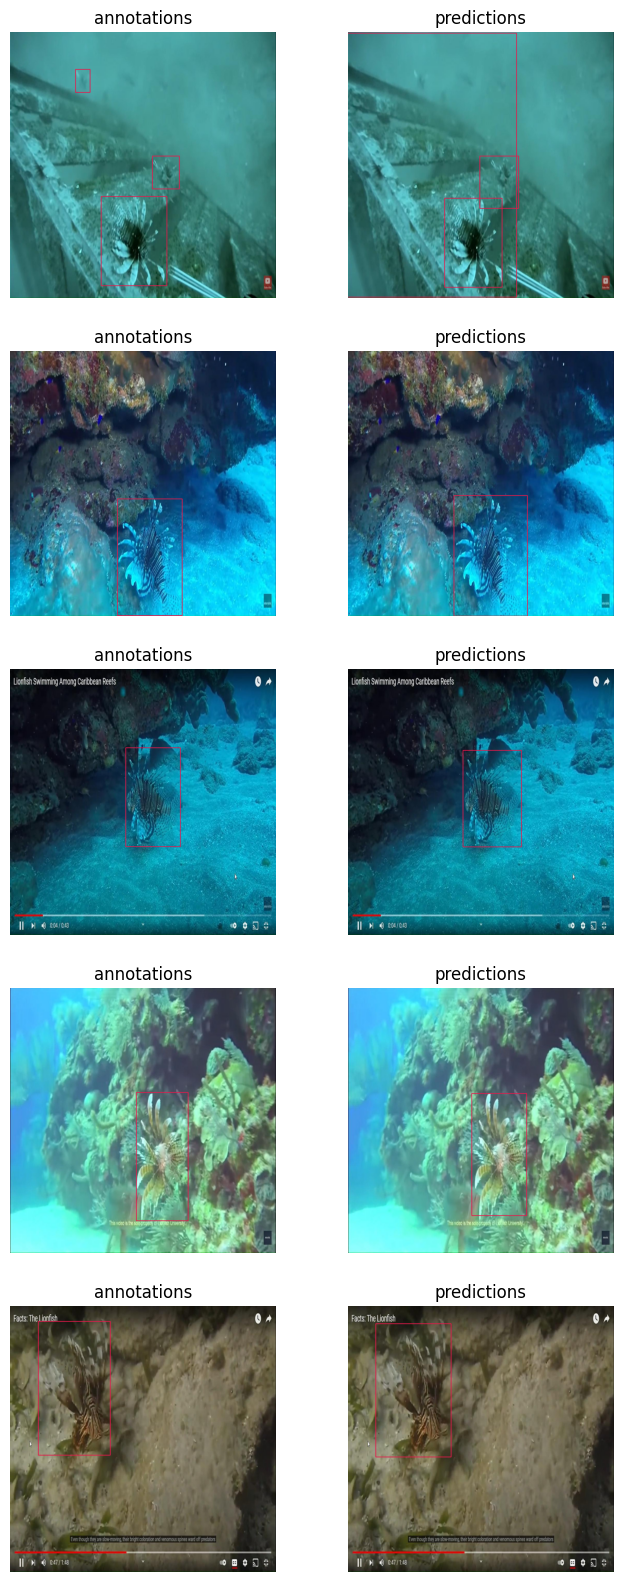

In [25]:
import random
random.seed(10)

import supervision as sv

MAX_IMAGE_COUNT = 5

n = min(MAX_IMAGE_COUNT, len(ds.images))

keys = list(ds.images.keys())
keys = random.sample(keys, n)

box_annotator = sv.BoxAnnotator()

images = []
titles = []

for key in keys:
    frame_with_annotations = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=ds.annotations[key],
        skip_label=True
    )
    images.append(frame_with_annotations)
    titles.append('annotations')
    frame_with_predictions = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=predictions[key],
        skip_label=True
    )
    images.append(frame_with_predictions)
    titles.append('predictions')

%matplotlib inline
sv.plot_images_grid(images=images, titles=titles, grid_size=(n, 2), size=(2 * 4, n * 4))

### Confusion matrix

In [26]:
!pip install onemetric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.0 MB/s eta 0:00:00


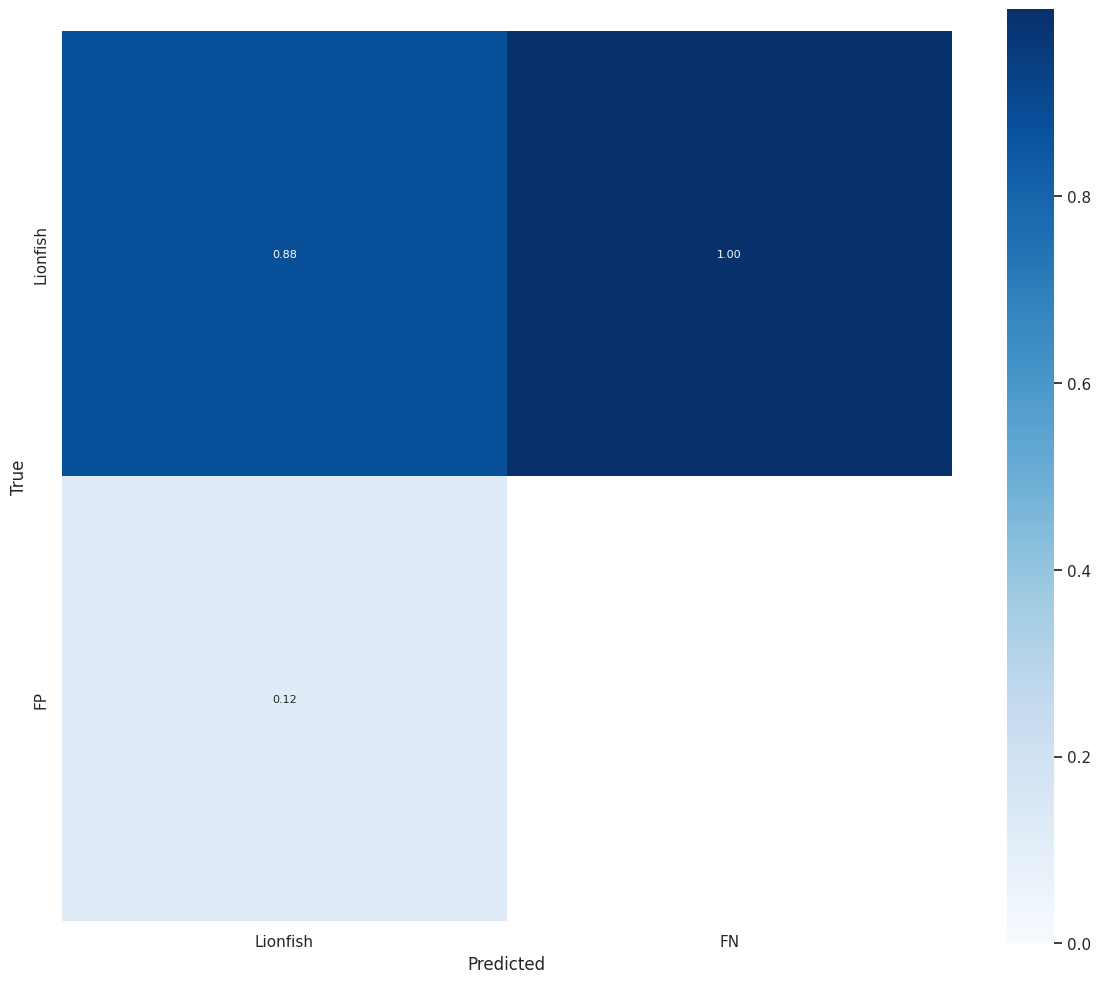

In [27]:
import os

import numpy as np

from onemetric.cv.object_detection import ConfusionMatrix

keys = list(ds.images.keys())

annotation_batches, prediction_batches = [], []

for key in keys:
    annotation=ds.annotations[key]
    annotation_batch = np.column_stack((
        annotation.xyxy,
        annotation.class_id
    ))
    annotation_batches.append(annotation_batch)

    prediction=predictions[key]
    prediction_batch = np.column_stack((
        prediction.xyxy,
        prediction.class_id,
        prediction.confidence
    ))
    prediction_batches.append(prediction_batch)

confusion_matrix = ConfusionMatrix.from_detections(
    true_batches=annotation_batches,
    detection_batches=prediction_batches,
    num_classes=len(ds.classes),
    conf_threshold=CONFIDENCE_TRESHOLD
)

confusion_matrix.plot(os.path.join(HOME, "confusion_matrix.png"), class_names=ds.classes)